In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import plotly.express as px
import numpy as np
import pandas as pd

from numbers import Real

from rent_vs_buy.rent import rent
from rent_vs_buy.buy import buy

In [3]:
# this cell is tagged 'parameters'

# basic parameters
home_price = 1500000
down_payment = 0.2
mortgage_rate = 0.03
term = 25

# speculative parameters

house_price_appreciation = 0.02
rental_appreciation = 0.02
return_on_investment = 0.04
inflation = 0.02

# costs

city = "vancouver"
# 2018 property tax rates 
tax_rates = {
    "vancouver": 0.00247, 
    "toronto": 0.00636, 
    "calgary": 0.00636, 
    "saskatoon":0.0866, 
    "edmonton":0.00882, 
    "regina": 0.00949, 
    "montreal": 0.00999, 
    "quebec": 0.01011, 
    "ottawa": 0.01068,
    "halifax":0.01206,
    "winnipeg":0.01212
}
property_tax_rate = tax_rates[city] if city in tax_rates else 0.01
maintenance = 0.0025
strata_fee = 0.007*home_price/12 # 0.7% rule of thumb
utilities = 100
homeowner_insurance = 0.0046 # annual percentage of value

# renter costs

monthly_rent = 3200
rent_increase = 0.02
security_deposit = 0.5 # month's rent
renter_insurance_rate =  0.005 # monthly

In [4]:
net_buy_position = buy(
    years=5,
    home_price=home_price,
    appreciation=house_price_appreciation,
    return_on_investment=return_on_investment,
    mortgage_rate=mortgage_rate,
    maintenance=maintenance,
    property_tax_rate=property_tax_rate,
    strata_fee=strata_fee,
    utilities=utilities,
    homeowner_insurance=homeowner_insurance,
    down_payment=down_payment,
    inflation=inflation,
    report=True
)

Initial Costs: $347,400
  Down Payment: $300,000
  Buyer Commission Cost: $19,400
  Property Transfer Tax: $28,000
Recurring Costs: $440,991
  Property Taxes: $19,473
  Maintenance: $19,710
  Insurance: $0
  Utilities: $6,307
  Strata Fees: $55,187
  Mortgage Payments: $340,314
Opportunity Costs: $120,680
Proceeds: $-584,523
  Selling Price: $-1,656,121
  Seller Commission: $45,903
  Mortgage Balance: $1,025,695
Net Cost: $324,549


In [5]:
net_rent_position = rent(
    years=5,
    monthly_rent=monthly_rent,
    rent_increase=rent_increase,
    renter_insurance_rate=renter_insurance_rate,
    return_on_investment=return_on_investment,
    inflation=inflation,
    report=True,
)

Initial Costs: $1,600
Recurring Costs: $201,827
Opportunity Costs: $21,132
Proceeds: $-1,600
Net Cost: $222,959


In [6]:
results = []

for months in np.arange(12,12*30):
    years = months/12
    net_rent_cost = rent(
        years=years,
        monthly_rent=monthly_rent,
        rent_increase=rent_increase,
        renter_insurance_rate=renter_insurance_rate,
        return_on_investment=return_on_investment,
        inflation=inflation,
        report=False,
    )
    net_buy_cost = buy(
        years=years,
        home_price=home_price,
        appreciation=house_price_appreciation,
        return_on_investment=return_on_investment,
        mortgage_rate=mortgage_rate,
        maintenance=maintenance,
        property_tax_rate=property_tax_rate,
        strata_fee=strata_fee,
        utilities=utilities,
        homeowner_insurance=homeowner_insurance,
        down_payment=down_payment,
        inflation=inflation,
        report=False
    )
    decision = "rent" if net_rent_cost < net_buy_cost else "buy"
    results.append({"Years": years, "Scenario": "Buy", "Net Cost": net_buy_cost, "Decision": decision})
    results.append({"Years": years, "Scenario": "Rent", "Net Cost": net_rent_cost, "Decision": decision})
    
df = pd.DataFrame(results)

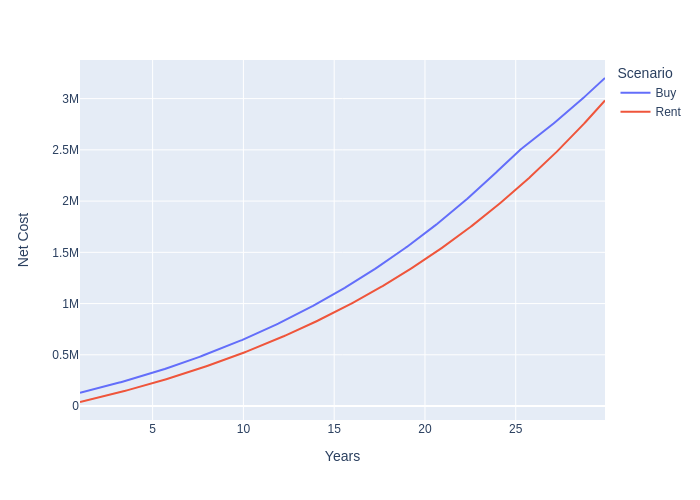

In [7]:
fig = px.line(
    df,
    x="Years",
    y="Net Cost",
    color="Scenario",
)

fig.show(renderer="png")